In [1]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice, AnalogDevice
from pulser import waveforms
from pulser_simulation import QutipEmulator, SimConfig
import qutip
import matplotlib.pyplot as plt
import numpy as np

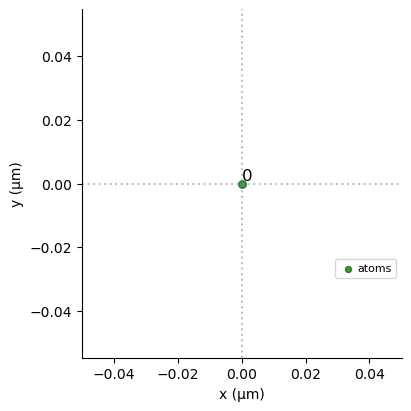

In [2]:
coords = [[0,0]]
reg = Register.from_coordinates(coords)
reg.draw()

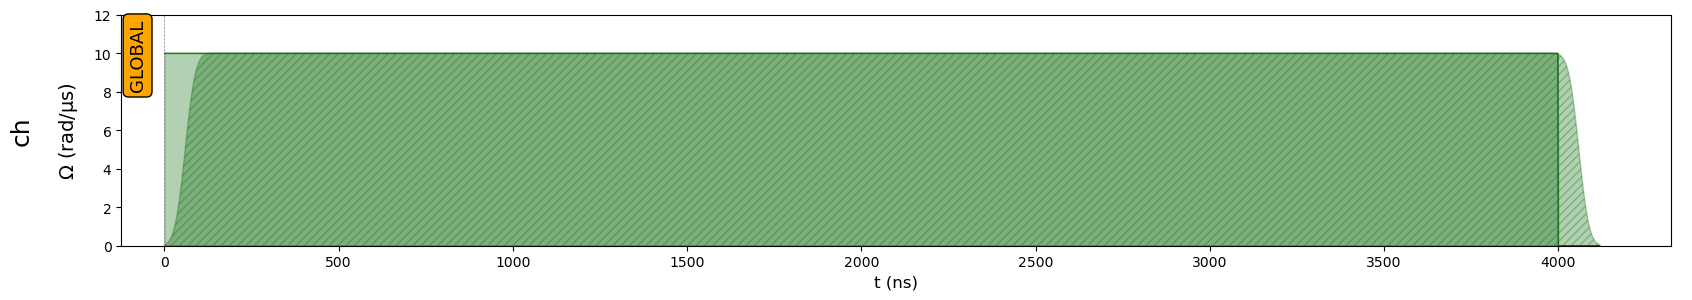

In [35]:
seq = Sequence(reg, AnalogDevice)

seq.declare_channel('ch', 'rydberg_global')
pulse = Pulse.ConstantPulse(4000, 10, 0, 0)
seq.add(pulse, 'ch')
seq.draw()

operator = qutip.basis(2,0).proj()

sim = QutipEmulator.from_sequence(seq, with_modulation=False)
clean_res = sim.run()


In [36]:
clean_magnetization = clean_res.expect([operator])[0]

In [43]:
seq = Sequence(reg, AnalogDevice)

seq.declare_channel('ch', 'rydberg_global')
pulse = Pulse.ConstantPulse(4000, 10, 0, 0)
seq.add(pulse, 'ch')

operator = qutip.basis(2,0).proj()

config = SimConfig(
    ("SPAM", "doppler", "amplitude"),
    eta=0.05,
    epsilon=0.05,
    epsilon_prime=0.05,
    temperature=30, #microkelvins
    runs=10,
    samples_per_run=100,
)

sim = QutipEmulator.from_sequence(
    seq,
    config = config,
    with_modulation=False,
)

noisy_res = sim.run()
noisy_magnetization = noisy_res.expect([operator])[0]


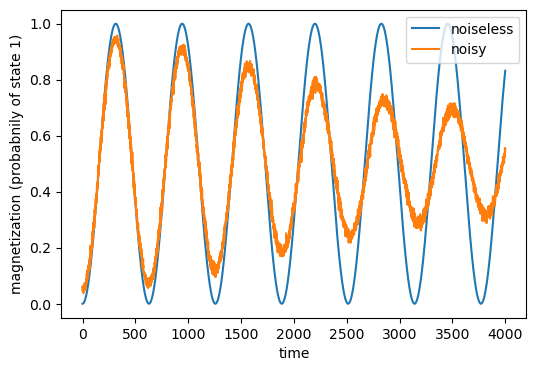

In [44]:
plt.figure(figsize=(6,4))
plt.plot(clean_magnetization, label='noiseless')
plt.plot(noisy_magnetization, label='noisy')
plt.xlabel("time")
plt.ylabel('magnetization (probabnily of state 1)')
plt.legend()